In [2]:
import numpy as np
import pandas as pd

In [ ]:
# Loan Data Analysis

## Introduction
This notebook analyzes a loan dataset, exploring factors such as loan amounts, interest rates, and payment behavior. The goal is to understand trends, relationships, and possible predictors of loan success.

In [8]:
loan_data = pd.read_csv(r"C:\Users\HP\Desktop\potfolio Data_analytics\loan-data (1).csv", delimiter = ";", encoding="ISO-8859-1")

In [9]:
# Display the first few rows
print("Loan Data Sample:")
print(loan_data.head())

Loan Data Sample:
         id issue_d  loan_amnt loan_status  funded_amnt        term int_rate  \
0  48010226  May-15    35000.0     Current      35000.0   36 months    13.33   
1  57693261     NaN    30000.0     Current      30000.0   36 months   þëè.89   
2  59432726  Sep-15    15000.0     Current      15000.0   36 months   íîå.53   
3  53222800  Jul-15     9600.0     Current       9600.0   36 months   þëè.89   
4  57803010  Aug-15     8075.0     Current       8075.0   36 months    19.19   

  installment grade sub_grade verification_status  \
0     1184.86     C        C3            Verified   
1      938.57     A        A5     Source Verified   
2      494.86     B        B5            Verified   
3      300.35     A        A5        Not Verified   
4      296.78   NaN        E3     Source Verified   

                                                 url addr_state  total_pymnt  
0  https://www.lendingclub.com/browse/loanDetail....         CA      9452.96  
1  https://www.lendingcl

In [10]:
# Get information about the dataset
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   issue_d              9500 non-null   object 
 2   loan_amnt            9500 non-null   float64
 3   loan_status          9500 non-null   object 
 4   funded_amnt          9500 non-null   float64
 5   term                 9500 non-null   object 
 6   int_rate             9500 non-null   object 
 7   installment          9500 non-null   object 
 8   grade                9485 non-null   object 
 9   sub_grade            9486 non-null   object 
 10  verification_status  9500 non-null   object 
 11  url                  10000 non-null  object 
 12  addr_state           9500 non-null   object 
 13  total_pymnt          9500 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [11]:
# Display statistical summary
print("Statistical Summary:")
print(loan_data.describe())

Statistical Summary:
                 id     loan_amnt   funded_amnt   total_pymnt
count  1.000000e+04   9500.000000   9500.000000   9500.000000
mean   5.401581e+07  15273.463158  15311.042105   3143.850941
std    9.416985e+06   8527.234720   8531.989496   4222.351754
min    3.733320e+05   1000.000000   1000.000000      0.000000
25%    4.628504e+07   8743.750000   8800.000000    889.592500
50%    5.542314e+07  14000.000000  14000.000000   1973.705000
75%    6.184264e+07  20000.000000  20000.000000   3765.250000
max    6.861652e+07  35000.000000  35000.000000  41913.620000


In [12]:
# Check for missing values
print("Missing Values:")
print(loan_data.isnull().sum())

Missing Values:
id                       0
issue_d                500
loan_amnt              500
loan_status            500
funded_amnt            500
term                   500
int_rate               500
installment            500
grade                  515
sub_grade              514
verification_status    500
url                      0
addr_state             500
total_pymnt            500
dtype: int64


In [14]:
loan_data_dict = pd.read_excel(r"C:\Users\HP\Desktop\potfolio Data_analytics\loan-data-dictionary (1).xlsx")

D:\python\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [15]:
# Preview the data dictionary
print("Data Dictionary:")
print(loan_data_dict.head())

Data Dictionary:
   ColumnNames                                        Description
0           id      A unique LC assigned ID for the loan listing.
1      issue_d                The month which the loan was funded
2    loan_amnt  The listed amount of the loan applied for by t...
3  loan_status                         Current status of the loan
4  funded_amnt  The total amount committed to that loan at tha...


In [17]:
# Display column names
print(loan_data.columns)

Index(['id', 'issue_d', 'loan_amnt', 'loan_status', 'funded_amnt', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'verification_status',
       'url', 'addr_state', 'total_pymnt'],
      dtype='object')


In [ ]:
## Data Cleaning

To ensure accuracy, we handled missing values by filling numerical columns with the mean and categorical columns with the mode. For the `int_rate` column, we removed non-numeric characters and converted it to a float. Additionally, we converted the `issue_d` column to datetime format and extracted the month and year.


In [19]:
# Fill numerical columns with the mean (example with 'loan_amnt')
loan_data['loan_amnt'] = loan_data['loan_amnt'].fillna(loan_data['loan_amnt'].mean())

# Fill a categorical column with the mode (example with 'loan_status')
loan_data['loan_status'] = loan_data['loan_status'].fillna(loan_data['loan_status'].mode()[0])

In [20]:
# Verify that missing values have been handled
print("Missing Values After Handling:")
print(loan_data.isnull().sum())

Missing Values After Handling:
id                       0
issue_d                500
loan_amnt                0
loan_status              0
funded_amnt            500
term                   500
int_rate               500
installment            500
grade                  515
sub_grade              514
verification_status    500
url                      0
addr_state             500
total_pymnt            500
dtype: int64


In [23]:
# Use regular expressions to remove any non-numeric characters, like letters or special symbols
loan_data['int_rate'] = loan_data['int_rate'].replace('[^0-9.]', '', regex=True)

In [24]:
# Convert the cleaned 'int_rate' to a numeric type, coercing any remaining errors to NaN
loan_data['int_rate'] = pd.to_numeric(loan_data['int_rate'], errors='coerce')

In [25]:
# Fill missing values with the mean
loan_data['int_rate'] = loan_data['int_rate'].fillna(loan_data['int_rate'].mean())

In [26]:
# Verify data type and missing values
print("int_rate data type:", loan_data['int_rate'].dtype)
print("Missing values in int_rate:", loan_data['int_rate'].isnull().sum())

int_rate data type: float64
Missing values in int_rate: 0


In [27]:
# Summary statistics for numerical columns
print(loan_data.describe())

                 id     loan_amnt   funded_amnt      int_rate   total_pymnt
count  1.000000e+04  10000.000000  10000.000000  10000.000000   9500.000000
mean   5.401581e+07  15273.463158  15311.042105      7.524344   3143.850941
std    9.416985e+06   8311.298441   8315.932811      7.977559   4222.351754
min    3.733320e+05   1000.000000   1000.000000      0.170000      0.000000
25%    4.628504e+07   9000.000000   9118.750000      0.530000    889.592500
50%    5.542314e+07  15000.000000  15000.000000      0.990000   1973.705000
75%    6.184264e+07  20000.000000  20000.000000     14.990000   3765.250000
max    6.861652e+07  35000.000000  35000.000000     28.990000  41913.620000


In [ ]:
## Exploratory Data Analysis

### Distribution of Loan Amounts
This histogram shows the distribution of loan amounts. Understanding loan amounts helps to identify the most common loan sizes and any outliers.

**Interpretation**: The distribution of loan amounts is centered around a certain range, with a few high-value loans indicating potential outliers.

Matplotlib is building the font cache; this may take a moment.


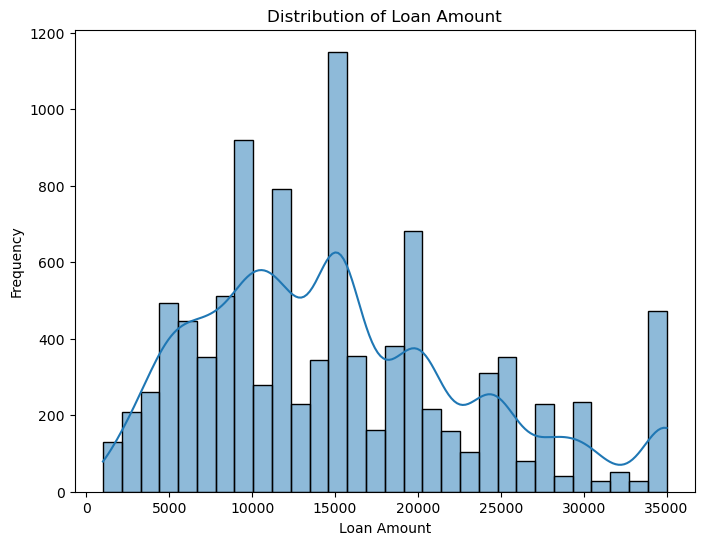

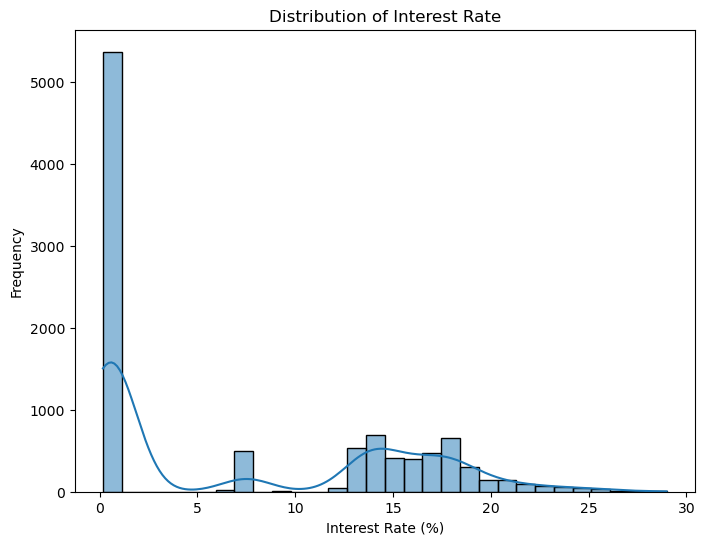

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for loan amount
plt.figure(figsize=(8, 6))
sns.histplot(loan_data['loan_amnt'], bins=30, kde=True)
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

# Histogram for interest rate
plt.figure(figsize=(8, 6))
sns.histplot(loan_data['int_rate'], bins=30, kde=True)
plt.title("Distribution of Interest Rate")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
### Correlation Between Numeric Variables

This heatmap illustrates the correlations between numeric variables in the dataset.

**Interpretation**: There is a positive correlation between `loan_amnt` and `total_pymnt`, suggesting that higher loan amounts generally result in higher total payments. Interest rate (`int_rate`) shows little correlation with loan amount.

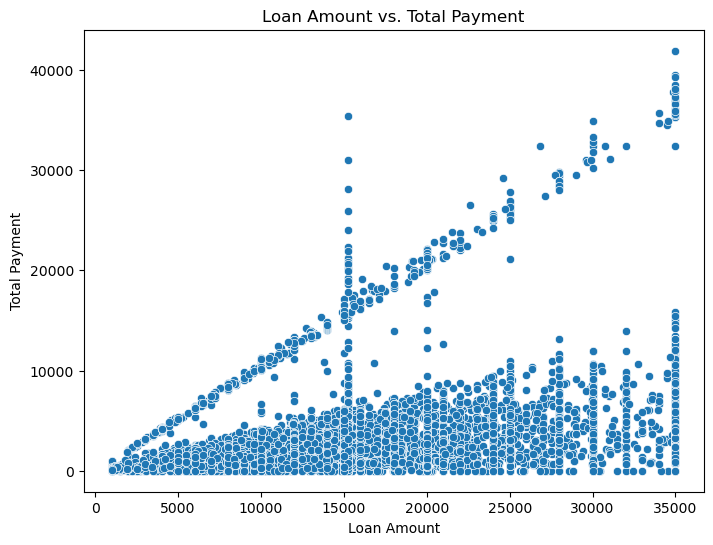

ValueError: could not convert string to float: 'May-15'

<Figure size 1000x800 with 0 Axes>

In [29]:
# Scatter plot of loan amount vs. total payment
plt.figure(figsize=(8, 6))
sns.scatterplot(data=loan_data, x='loan_amnt', y='total_pymnt')
plt.title("Loan Amount vs. Total Payment")
plt.xlabel("Loan Amount")
plt.ylabel("Total Payment")
plt.show()

# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 8))
sns.heatmap(loan_data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [30]:
# Select only numeric columns
numeric_cols = loan_data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix on numeric columns
corr_matrix = numeric_cols.corr()

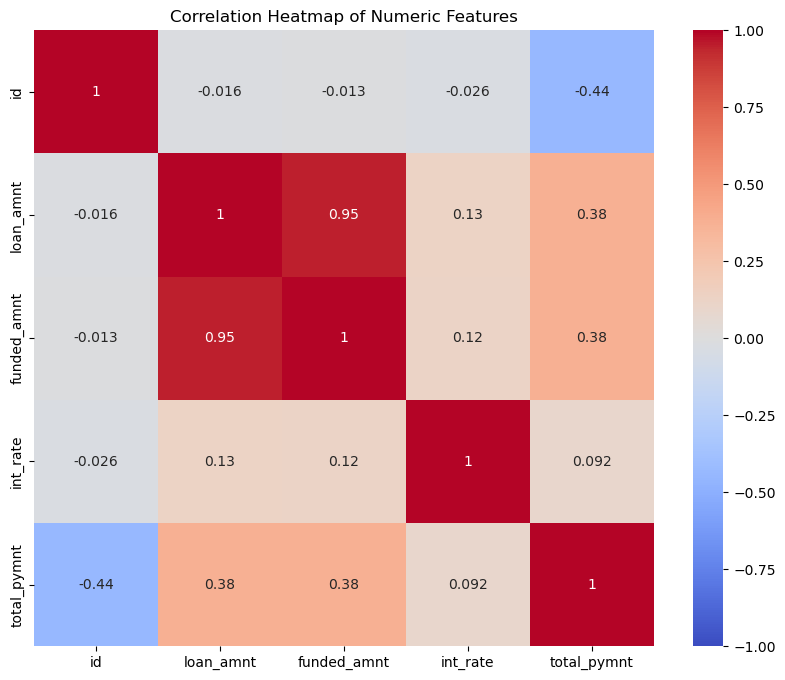

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [32]:
print("Data Types:")
print(loan_data.dtypes)

Data Types:
id                       int64
issue_d                 object
loan_amnt              float64
loan_status             object
funded_amnt            float64
term                    object
int_rate               float64
installment             object
grade                   object
sub_grade               object
verification_status     object
url                     object
addr_state              object
total_pymnt            float64
dtype: object


In [33]:
# Convert 'issue_d' to datetime
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y', errors='coerce')

# Extract month and year
loan_data['issue_month'] = loan_data['issue_d'].dt.month
loan_data['issue_year'] = loan_data['issue_d'].dt.year

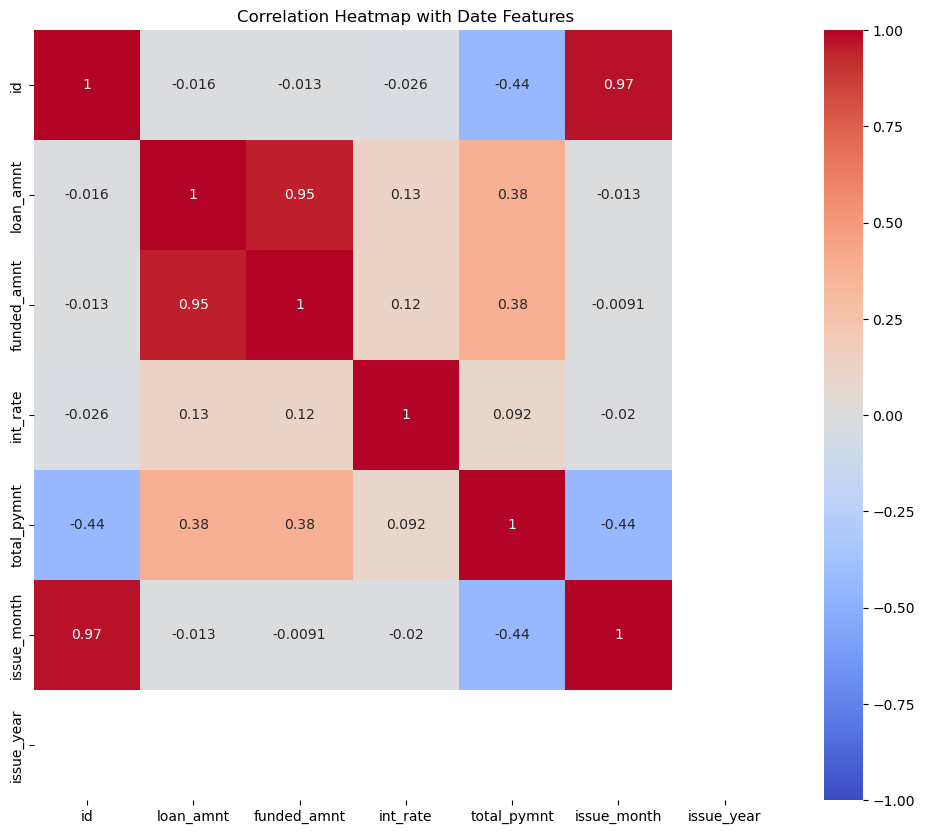

In [34]:
# Recompute correlation matrix
numeric_cols = loan_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

# Plot the updated heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap with Date Features")
plt.show()

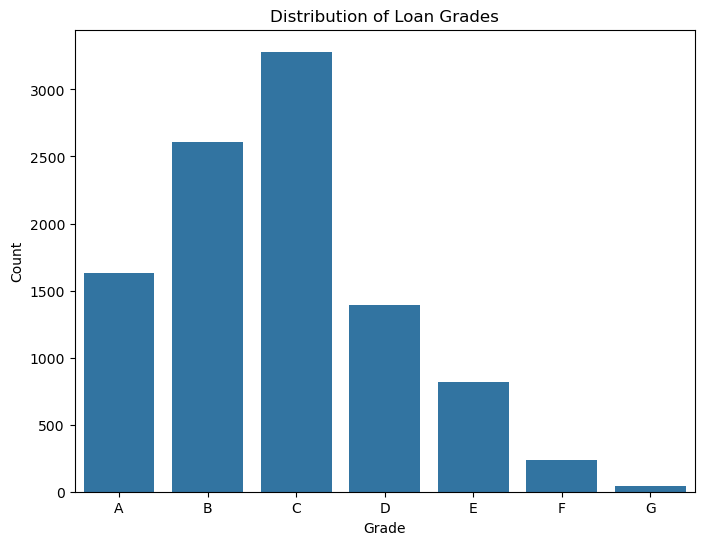

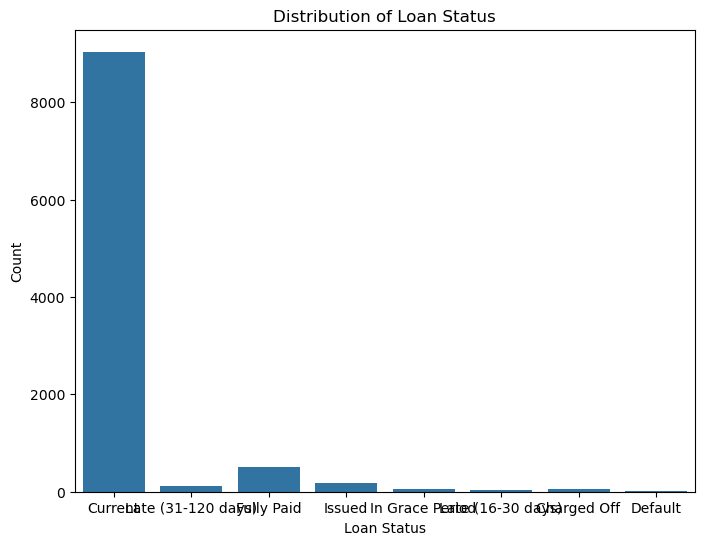

In [35]:
# Bar plot for loan grades
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='grade', order=sorted(loan_data['grade'].unique()))
plt.title("Distribution of Loan Grades")
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

# Bar plot for loan status
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='loan_status')
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [ ]:
## Conclusion
1. **Loan Amounts**: Most loans fall within a certain range, with a few high-value outliers.
2. **Interest Rates**: Interest rates are relatively low for smaller loans and increase with loan amounts.
3. **Total Payments**: There’s a strong positive correlation between loan amount and total payment, indicating that larger loans generally require higher repayments.

These insights can help lending institutions better understand common loan behaviors and potentially optimize lending strategies.
